## GDP and Life Expectancy
goal of the project is to find:
* average gdp, 
* average lifespan, 
* correlation between gdp and life span, 
* comparing each country's gdp 
* comparing each countrys life span

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

In [15]:
df = pd.read_csv('all_data.csv')
print(df)


     Country  Year  Life expectancy at birth (years)           GDP
0      Chile  2000                              77.3  7.786093e+10
1      Chile  2001                              77.3  7.097992e+10
2      Chile  2002                              77.8  6.973681e+10
3      Chile  2003                              77.9  7.564346e+10
4      Chile  2004                              78.0  9.921039e+10
..       ...   ...                               ...           ...
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10

[96 rows x 4 columns]


In [39]:
print(df.columns)
print(len(df))
#renaming columns
df = df.rename(columns={'Country':'country','Year':'year','Life expectancy at birth (years)':"expectancy",'GDP':'gdp'})
print(df.columns)



Index(['country', 'year', 'expectancy', 'gdp'], dtype='object')
96
Index(['country', 'year', 'expectancy', 'gdp'], dtype='object')


In [38]:
#showing summary statistics
print(df.describe())
print(df.groupby('country').expectancy.describe())
print(df.groupby('country').gdp.describe())

              year  expectancy           gdp
count    96.000000   96.000000  9.600000e+01
mean   2007.500000   72.789583  3.880499e+12
std       4.633971   10.672882  5.197561e+12
min    2000.000000   44.300000  4.415703e+09
25%    2003.750000   74.475000  1.733018e+11
50%    2007.500000   76.750000  1.280220e+12
75%    2011.250000   78.900000  4.067510e+12
max    2015.000000   81.000000  1.810000e+13
                          count      mean       std   min     25%    50%  \
country                                                                    
Chile                      16.0  78.94375  1.058911  77.3  77.975  79.00   
China                      16.0  74.26250  1.318016  71.7  73.400  74.45   
Germany                    16.0  79.65625  0.975000  78.0  78.950  79.85   
Mexico                     16.0  75.71875  0.620987  74.8  75.225  75.65   
United States of America   16.0  78.06250  0.832566  76.8  77.425  78.15   
Zimbabwe                   16.0  50.09375  5.940311  44.3  45.1

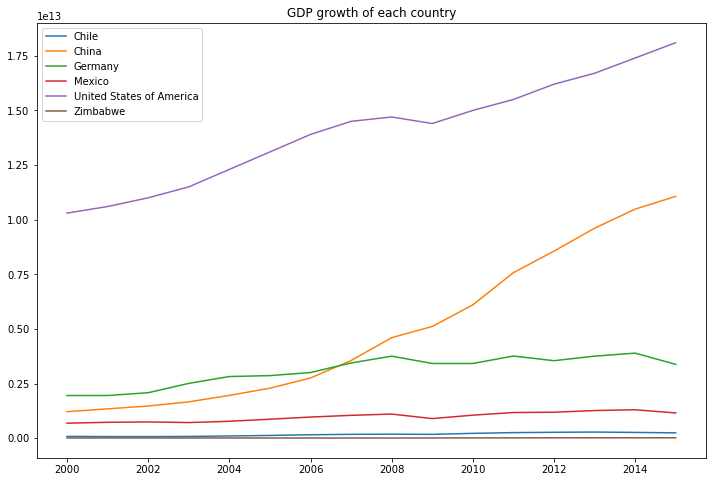

In [90]:
#countries gdp over time
legend =[]
plt.figure(figsize=(12,8))
plt.title("GDP growth of each country")
for i in df.country.unique():
    temp =  df[df.country == i]
    plt.plot(temp.year , temp.gdp)
    legend.append(i)
plt.legend(legend)


### Based on the graph above we can see that USA has the highest GDP but China seems to have a rapid gdp growth
### We can also see that germany's gdp seems to have stagnated based on this graph while the other countries seem to have minimal growth

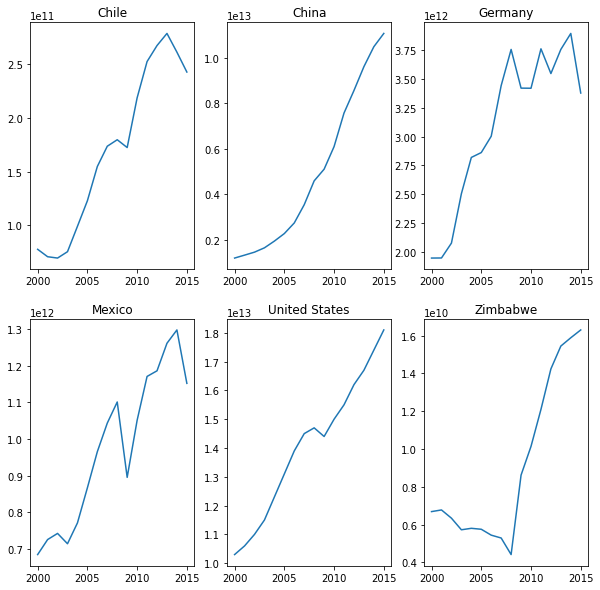

In [104]:
#putting all the countrys in a list
countrydf = []
countryname = []
for i in df.country.unique():
    temp =  df[df.country == i]
    countrydf.append(temp)
    if i =="United States of America":
        countryname.append("United States")
        continue
    countryname.append(i)
#gdp of each country more detailed look
plt.figure(figsize = (10,10))
#plt.suptitle("GDP of Each Country")
for i in range(len(countrydf)):
    ax = plt.subplot(2,3,i+1)
    plt.title(countryname[i])
    plt.plot(countrydf[i].year,countrydf[i].gdp)


## analysis
This Graph shows a better comparison and a better indication of the growth than the previous graph. While in the previous graph the smaller countries seems to have stagnated this graph shows otherwise. Each country seems to have an increase in gdp overtime but we can visualise their drops and their rate of growth.
Chile's gdp seems to have grown from the start, however turbulence have come to the nation and their gdp has drop from the previous year
China seems to have a consistent growth and exponential growth with little to no setbacks
Germany seems to have a linear growth in the early 2000s But has seen stagnated and even seen setbacks in their gdp
Mexico seems to have a linear growth but drop hard in the 2009 because of the economic downturn in which they recovered from but unfortunately turbulence has come again in 2016
United states GDP seems to have grown exponentialy in the early 2000s until the economic downturn in 2009 but they have seem to recover from it and is currently having a linear increase in their gdp
Zimbabwe does not seem to have an increase in gdp in the early 2000s and even took a dive in 2009 but they have seem to recover and their gdp is growing rapidly 

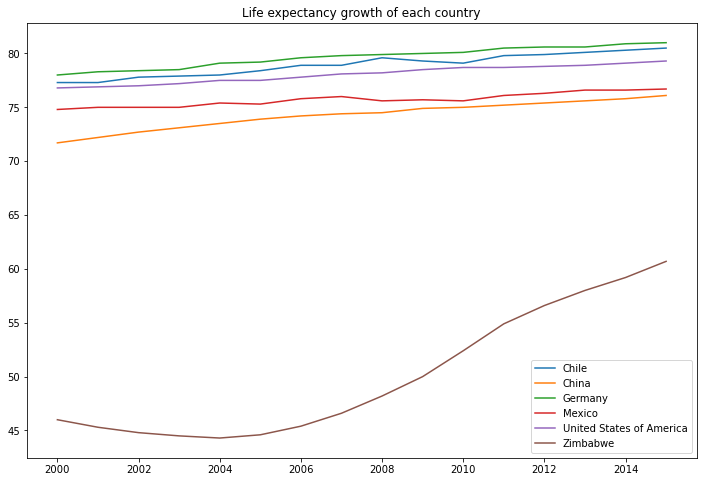

In [89]:
#life expectancy
legend =[]
plt.figure(figsize=(12,8))
plt.title("Life expectancy growth of each country")
for i in df.country.unique():
    temp =  df[df.country == i]
    plt.plot(temp.year , temp.expectancy)
    legend.append(i)
plt.legend(legend)

# Analysis
Zimbabwe seems to have the lowest life expectancy while germany seems to have the highest one
We can see that life expectancy grow at a very slow pace after reaching 70+ year
Zimbabwes may have the lowest life expectancy but they are catching up at a rapid pace

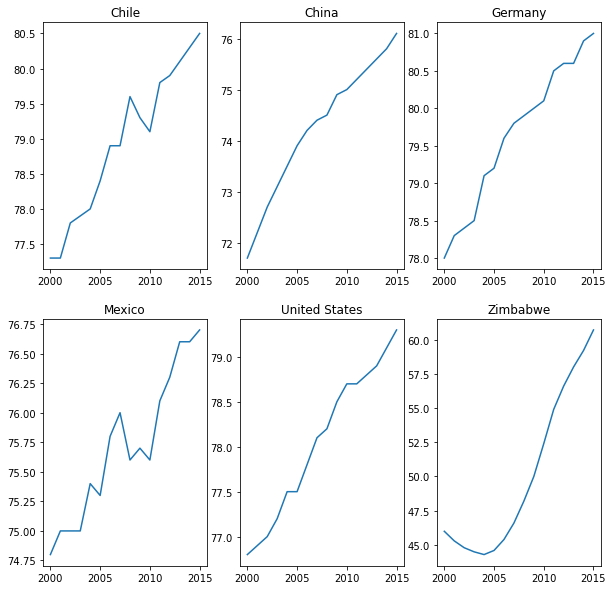

In [105]:
plt.figure(figsize = (10,10))
#plt.suptitle("GDP of Each Country")
for i in range(len(countrydf)):
    ax = plt.subplot(2,3,i+1)
    plt.title(countryname[i])
    plt.plot(countrydf[i].year,countrydf[i].expectancy)

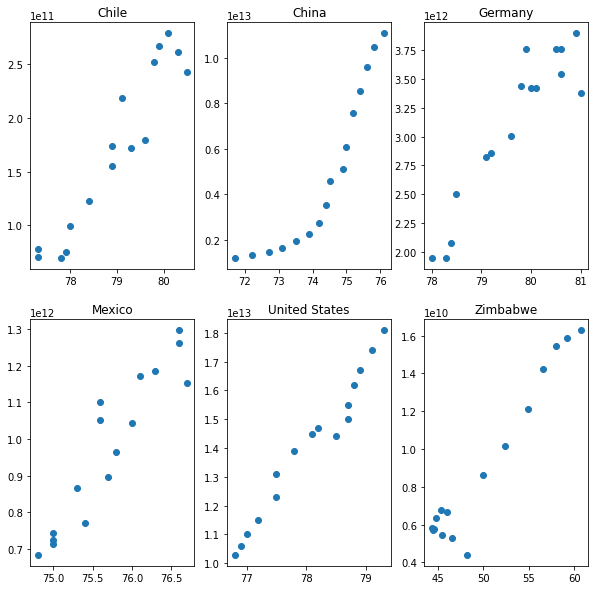

In [107]:
plt.figure(figsize = (10,10))
#plt.suptitle("GDP of Each Country")
for i in range(len(countrydf)):
    ax = plt.subplot(2,3,i+1)
    plt.title(countryname[i])
    plt.scatter(countrydf[i].expectancy,countrydf[i].gdp)

Text(0.5, 1.0, 'Life Expectancy')

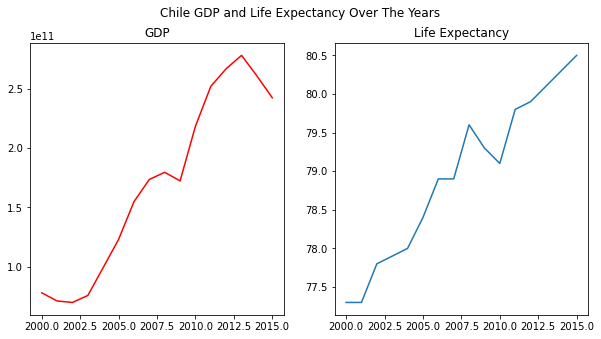

In [87]:
#chiles life expectancy and gdp over time
chile = df[df.country == 'Chile']
xticks = range(1999,2017)

plt.figure(figsize=(10,5))
plt.suptitle('Chile GDP and Life Expectancy Over The Years')
plt.subplot(1,2,1)
plt.plot(chile.year,chile.gdp, color = 'Red')
plt.title("GDP")
#plt.ticklabel_format(style = 'plain')

plt.subplot(1,2,2)
plt.plot(chile.year, chile.expectancy)
plt.subplots_adjust(wspace=0.2)
plt.title('Life Expectancy')

Text(0.5, 1.0, 'Life Expectancy')

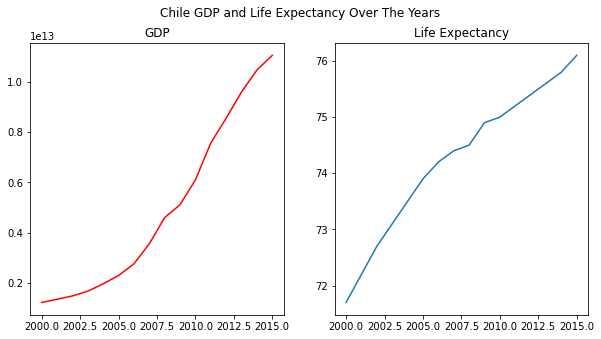

In [111]:
#chiles life expectancy and gdp over time
chile = df[df.country == 'China' ]
xticks = range(1999,2017)

plt.figure(figsize=(10,5))
plt.suptitle('Chile GDP and Life Expectancy Over The Years')
plt.subplot(1,2,1)
plt.plot(chile.year,chile.gdp, color = 'Red')
plt.title("GDP")
#plt.ticklabel_format(style = 'plain')

plt.subplot(1,2,2)
plt.plot(chile.year, chile.expectancy)
plt.subplots_adjust(wspace=0.2)
plt.title('Life Expectancy')

Text(0.5, 1.0, 'Life Expectancy')

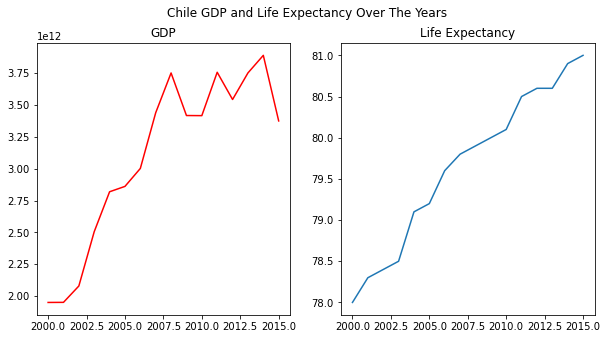

In [112]:
#chiles life expectancy and gdp over time
chile = df[df.country == 'Germany' ]
xticks = range(1999,2017)

plt.figure(figsize=(10,5))
plt.suptitle('Chile GDP and Life Expectancy Over The Years')
plt.subplot(1,2,1)
plt.plot(chile.year,chile.gdp, color = 'Red')
plt.title("GDP")
#plt.ticklabel_format(style = 'plain')

plt.subplot(1,2,2)
plt.plot(chile.year, chile.expectancy)
plt.subplots_adjust(wspace=0.2)
plt.title('Life Expectancy')

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


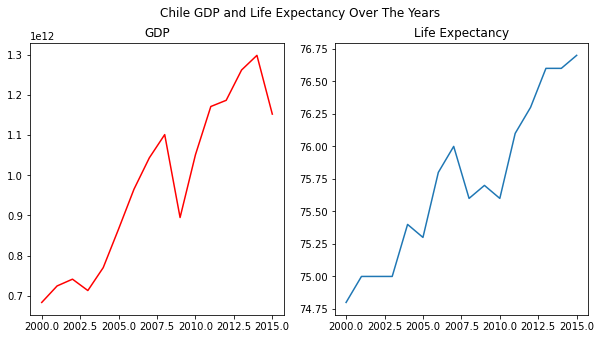

In [110]:
#chiles life expectancy and gdp over time
chile = df[df.country == 'Mexico']
xticks = range(1999,2017)

plt.figure(figsize=(10,5))
plt.suptitle('Chile GDP and Life Expectancy Over The Years')
plt.subplot(1,2,1)
plt.plot(chile.year,chile.gdp, color = 'Red')
plt.title("GDP")
#plt.ticklabel_format(style = 'plain')

plt.subplot(1,2,2)
plt.plot(chile.year, chile.expectancy)
plt.subplots_adjust(wspace=0.2)
plt.title('Life Expectancy')
print(df.country.unique())

Text(0.5, 1.0, 'Life Expectancy')

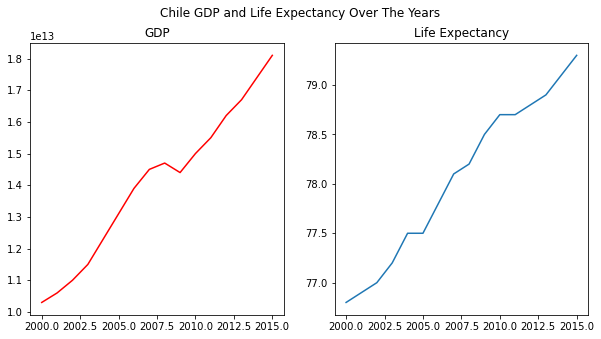

In [114]:
#chiles life expectancy and gdp over time
chile = df[df.country == 'United States of America' ]
xticks = range(1999,2017)

plt.figure(figsize=(10,5))
plt.suptitle('Chile GDP and Life Expectancy Over The Years')
plt.subplot(1,2,1)
plt.plot(chile.year,chile.gdp, color = 'Red')
plt.title("GDP")
#plt.ticklabel_format(style = 'plain')

plt.subplot(1,2,2)
plt.plot(chile.year, chile.expectancy)
plt.subplots_adjust(wspace=0.2)
plt.title('Life Expectancy')

Text(0.5, 1.0, 'Life Expectancy')

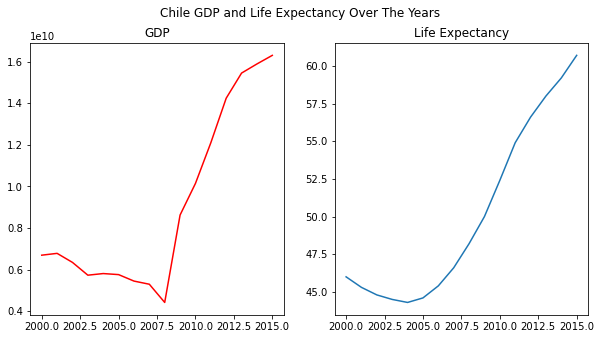

In [113]:
#chiles life expectancy and gdp over time
chile = df[df.country == 'Zimbabwe' ]
xticks = range(1999,2017)

plt.figure(figsize=(10,5))
plt.suptitle('Chile GDP and Life Expectancy Over The Years')
plt.subplot(1,2,1)
plt.plot(chile.year,chile.gdp, color = 'Red')
plt.title("GDP")
#plt.ticklabel_format(style = 'plain')

plt.subplot(1,2,2)
plt.plot(chile.year, chile.expectancy)
plt.subplots_adjust(wspace=0.2)
plt.title('Life Expectancy')

## Conclusion
We can see that Life expectancy seems to be going up over the years


GDP seems to also go higher over the years except for germany who seems to be having a stagnate gdp growth
